In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [5]:
df = pd.read_csv('D:/OneDrive - Hanoi University of Science and Technology/Me/Code/DatainHUST/CodePV/Dữ liệu mới/Dữ liệu solar Nghệ An- chuẩn/unzipped/Fullmonth/inv1_emi_t345678.csv',
                encoding="utf-8-sig",
                header=0,
                infer_datetime_format=True,
                parse_dates={'datetime':[4]},
                index_col=['datetime']
                )

In [6]:
df['time'] = df.index
df.loc[:,'year'] = pd.Series(df.index.year, df.index)
df.loc[:,'month'] = pd.Series(df.index.month, df.index)
df.loc[:,'day'] = pd.Series(df.index.day, df.index)
df.loc[:,'hour'] = pd.Series(df.index.hour, df.index)
df.loc[:,'dayofweek'] = pd.Series(df.index.dayofweek, df.index)
df.loc[:,'dayname'] = pd.Series(df.index.day_name(), df.index)
df.loc[:,'hourofweek'] = pd.Series((df.hour+24*df.dayofweek), df.index)
df.loc[:,'hourofmonth'] = pd.Series((df.hour+24*(df.day-1)), df.index)
df.loc[:,'Tcell']=pd.Series((df['Ambient temperature(℃)']+df['Irradiance(W/㎡)']/800*(25-20)), df.index)
df.loc[:,'Pm']=pd.Series((2.172*1.303*220*2*590*df['Irradiance(W/㎡)']/1000*(1+0.0045*(df['Tcell']-25))*20.5/100000), df.index)
df.loc[:,'Hieu suat']=pd.Series((df['Total input power(kW)']/df['Pm']*100), df.index)
df.loc[:,'date'] = pd.Series(df.index.date, df.index)
df=df[df['Ambient temperature(℃)']>6]
df=df[df['Irradiance(W/㎡)']>300]
df=df[df['Total input power(kW)']>76]
df.head(10)

,Unnamed: 0,Site Name_x,Management Domain_x,ManageObject_x,Inverter status,Grid voltage/Grid AB line voltage(V),BC line voltage(V),CA line voltage(V),Phase A voltage(V),Phase B voltage(V),...,day,hour,dayofweek,dayname,hourofweek,hourofmonth,Tcell,Pm,Hieu suat,date
datetime,,,,,,,,,,,,,,,,,,,,,
2022-03-22 13:25:00,970,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected : power limited,410.3,409.3,407.4,236.6,233.7,...,22,13,1,Tuesday,37,517,11.828125,120.787107,70.575413,2022-03-22
2022-03-22 13:40:00,973,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected : power limited,410.2,409.5,408.4,236.4,234.1,...,22,13,1,Tuesday,37,517,11.604375,122.384543,71.121727,2022-03-22
2022-03-26 11:10:00,1565,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected : power limited,413.4,414.2,411.6,238.3,235.9,...,26,11,5,Saturday,131,611,20.556875,126.509456,67.679526,2022-03-26
2022-03-26 13:05:00,1588,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected : power limited,408.5,409.6,406.6,236.9,234.7,...,26,13,5,Saturday,133,613,17.048125,124.267884,67.559692,2022-03-26
2022-03-26 13:20:00,1591,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected : power limited,407.4,409.0,406.2,236.2,234.3,...,26,13,5,Saturday,133,613,16.731875,121.387299,67.896724,2022-03-26
2022-04-09 10:40:00,3792,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected,413.1,412.2,410.4,238.4,236.2,...,9,10,5,Saturday,130,202,12.494375,118.130321,75.486970,2022-04-09
2022-04-09 10:45:00,3793,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected,414.1,413.1,411.6,238.4,236.2,...,9,10,5,Saturday,130,202,11.572500,112.587348,76.287435,2022-04-09
2022-04-13 12:35:00,4454,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected,412.7,411.6,409.4,238.3,235.7,...,13,12,2,Wednesday,60,300,11.606250,113.369838,74.345171,2022-04-13
2022-04-15 13:05:00,4780,VNM - Nghệ An - Nhà Máy,/BCG Energy,1020C0056057/6T21A9008074,Grid connected,411.7,412.2,409.1,237.2,235.8,...,15,13,4,Friday,109,349,10.645000,102.450760,76.917927,2022-04-15


In [7]:
df1=df.groupby(['month','date','hour'])[['Total input power(kW)','Ambient temperature(℃)','Irradiance(W/㎡)']].mean()
df1=df1.reset_index()
df1=df1[df1.groupby(['month','date'])['Irradiance(W/㎡)'].transform(max)==df1['Irradiance(W/㎡)']]
df1=df1.reset_index()
df1.loc[:,'Tcell']=pd.Series((df1['Ambient temperature(℃)']+df1['Irradiance(W/㎡)']/800*(25-20)), df1.index)
df1.loc[:,'Pm']=pd.Series((2.172*1.303*220*2*590*df1['Irradiance(W/㎡)']/1000*(1+0.0045*(df1['Tcell']-25))*20.5/100000), df1.index)
df1.loc[:,'Hieu suat']=pd.Series((df1['Total input power(kW)']/df1['Pm']*100), df1.index)
df1=df1[df1['Hieu suat']<80]
print(df1)
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=df1['Hieu suat'],
    name="Hiệu suất"))
fig . update_traces (
    showlegend = True 
    )
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.update_layout(height=600)
fig.update_layout(width=800)
fig.update_layout(yaxis_range=[50, 80])
fig.show()
fig5 = go.Figure()
fig5.add_trace(go.Scatter(
    x=df1.index,
    y=df1['Pm'],
    name="Lý thuyết"))
fig5.add_trace(go.Scatter(
    x=df1.index,
    y=df1['Total input power(kW)']+10,
    name="Thực tế"))
fig5 . update_traces (
    showlegend = True 
    )
fig5.update_layout(
    xaxis_title="Thời gian",
    yaxis_title="Công suất (Kw)"
)
fig5.update_layout(height=600)
fig5.update_layout(width=800)
fig5.show()

     index  month        date  hour  Total input power(kW)  \
0        0      3  2022-03-22    13              86.144000   
1        1      3  2022-03-26    11              85.621000   
2        3      4  2022-04-09    10              87.531500   
3        4      4  2022-04-13    12              84.285000   
4        5      4  2022-04-15    13              78.803000   
..     ...    ...         ...   ...                    ...   
98     467      8  2022-08-19    11              96.852600   
99     473      8  2022-08-21    12              99.510333   
100    476      8  2022-08-22    11              94.077833   
101    483      8  2022-08-23    12              94.986500   
102    489      8  2022-08-24    12              92.957583   

     Ambient temperature(℃)  Irradiance(W/㎡)      Tcell          Pm  Hieu suat  
0                  6.350000       858.600000  11.716250  121.586288  70.850095  
1                 15.200000       857.100000  20.556875  126.509456  67.679526  
2           

In [8]:
df1['stt']=df1.index
df_binary = df1[['stt', 'Hieu suat']] 
  
# Taking only the selected two attributes from the dataset 
df_binary.columns = ['stt', 'Hieu suat'] 
  
# Renaming the columns for easier writing of the code 
df_binary.head() 
  
# Displaying only the 1st  rows along with the column names 

,stt,Hieu suat
0,0,70.850095
1,1,67.679526
2,2,75.881234
3,3,74.345171
4,4,76.917927


-0.026330805573430816


C:\Users\badao\AppData\Local\Temp\ipykernel_2892\3909986184.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\badao\AppData\Local\Temp\ipykernel_2892\3909986184.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



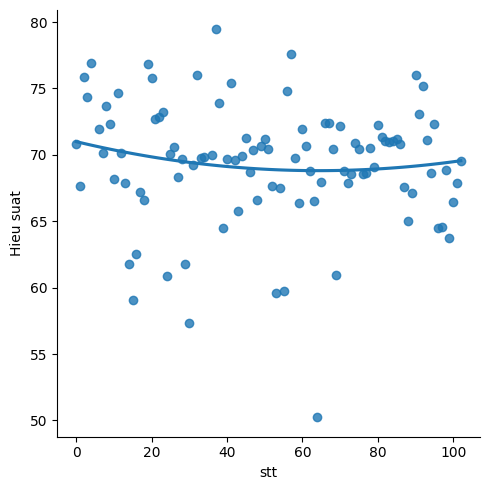

In [9]:
sns.lmplot(x ="stt", y ="Hieu suat", data = df_binary, order = 2, ci = None)
# Eliminating NaN or missing input numbers 
df_binary.fillna(method ='ffill', inplace = True)
X = np.array(df_binary['stt']).reshape(-1, 1) 
y = np.array(df_binary['Hieu suat']).reshape(-1, 1) 
  
# Separating the data into independent and dependent variables 
# Converting each dataframe into a numpy array  
# since each dataframe contains only one column 
df_binary.dropna(inplace = True) 
  
# Dropping any rows with Nan values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

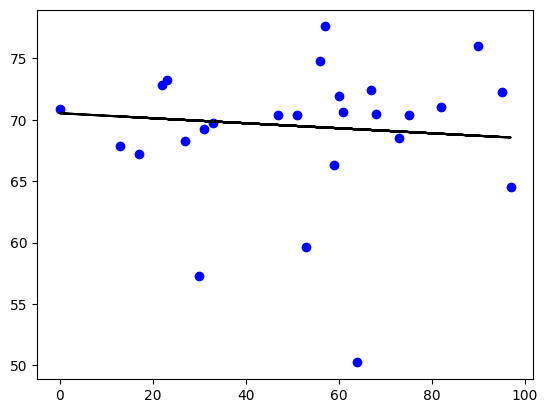

In [10]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

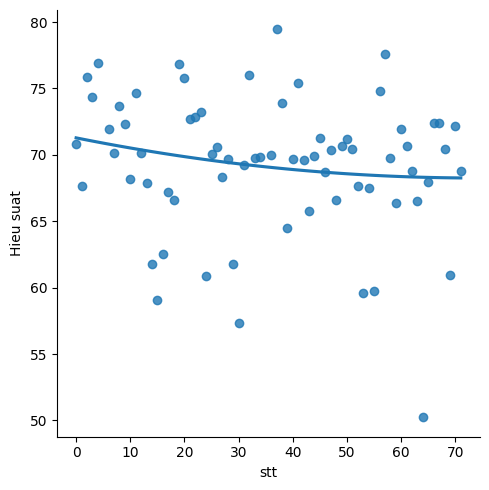

In [11]:
df_binary1 = df_binary[:][:70]
  
# Selecting the 1st 500 rows of the data 
sns.lmplot(x ="stt", y ="Hieu suat", data = df_binary1, 
                               order = 2, ci = None)

In [12]:
df_binary1.fillna(method ='ffill', inplace = True) 
  
X = np.array(df_binary1['stt']).reshape(-1, 1) 
y = np.array(df_binary1['Hieu suat']).reshape(-1, 1) 
  
df_binary1.dropna(inplace = True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

-0.06596608350220867


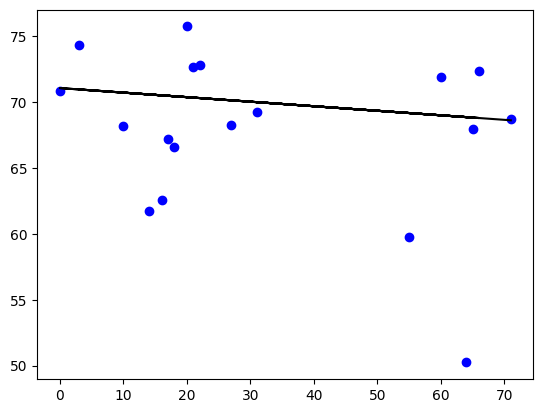

In [13]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

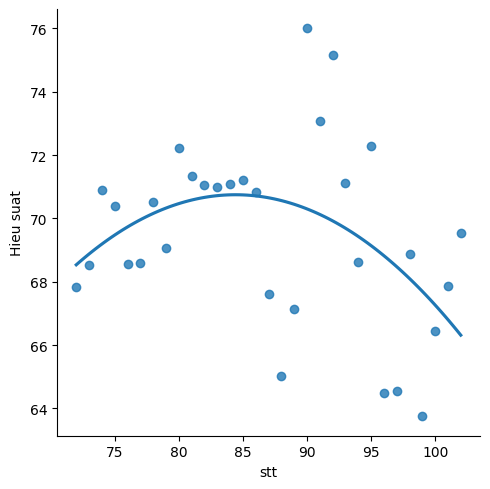

In [14]:
df_binary2 = df_binary[:][70:142]
  
# Selecting the 1st 500 rows of the data 
sns.lmplot(x ="stt", y ="Hieu suat", data = df_binary2, 
                               order = 2, ci = None)

In [15]:
df_binary2.fillna(method ='ffill', inplace = True) 
  
X = np.array(df_binary2['stt']).reshape(-1, 1) 
y = np.array(df_binary2['Hieu suat']).reshape(-1, 1) 
  
df_binary2.dropna(inplace = True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

-0.5958255312334975


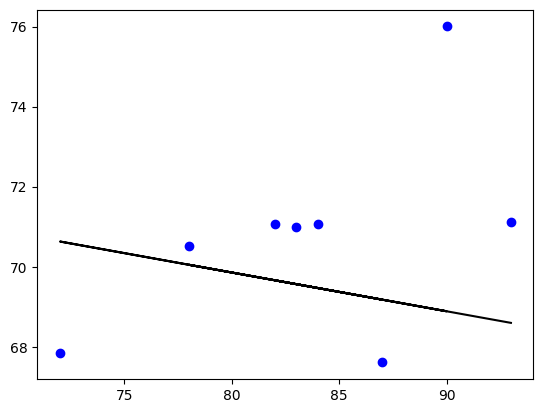

In [16]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 